### Data Preprocessing

In this, all the missing values of every attribute will be filled with either their mean, median or mode. In some cases, if the attribute is found to be not affecting Loan Status, it will be dropped. Along will that all attributes will be converted to categorial type. Label Encoding will also be done to make it easier for classifier to process

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import mstats

In [24]:
df=pd.read_csv("Dataset/train.csv")

The missing values in each column are : 

In [25]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling individual Attributes

### Gender

Through the visualization done earlier we can infer that gender does not influence the chances of getting a loan, hence we can remove this particular attribute.

In [26]:
df=df.drop(['Gender'], axis=1)

### Married

Since there are only 3 missing values in the Married Attribute, we can drop those tuples

In [27]:
df=df.dropna(axis=0, subset=["Married"])
MarriedTypes = ["No","Yes"]
df.Married = df.Married.astype("category",categories=MarriedTypes).cat.codes

### Dependents

In [28]:
df["Dependents"].replace('3+','3',inplace=True)
df["Dependents"].fillna(df.Dependents.median(), inplace=True)

### Education

In [29]:
EducationTypes = ["Graduate","Not Graduate"]
df.Education = df.Education.astype("category",categories=EducationTypes).cat.codes

### Self Employed

Since we can not predict the employment status of the individual by median, the default value is NO

In [30]:
df['Self_Employed']=df['Self_Employed'].fillna('No')
Self_EmployedTypes = ["No","Yes"]
df.Self_Employed = df.Self_Employed.astype("category",categories=Self_EmployedTypes).cat.codes

### Applicant Income

In visualization, we has seen that Applicant Income had outliers 

In [37]:
df = df[np.abs(df.ApplicantIncome-df.ApplicantIncome.median())<=(2*df.ApplicantIncome.std())]
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,1,0,1,0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,1,3,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,1,2,0,0,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,1,2,0,0,3200,700.0,70.0,360.0,1.0,Urban,Y


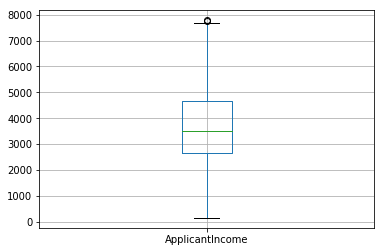

In [38]:
df.boxplot(column='ApplicantIncome')
plt.show()

Converting numerical data to categorical data

In [11]:
df["ApplicantIncome"] = pd.qcut(df.ApplicantIncome, 5, labels=[0,1,2,3,4])

### Co-Applicant Income

Converting numerical data to categorical data

In [12]:
df["CoapplicantIncome"] = pd.cut(df.CoapplicantIncome, 5, labels=[0,1,2,3,4])

### Loan Amount

Missing values in Loan Amount can be filled with median since its the most accurate in central tendencies

In [39]:
df = df[np.abs(df.LoanAmount-df.LoanAmount.mean())<=(2*df.LoanAmount.std())]
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,1,0,1,0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,1,3,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,1,2,0,0,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,1,2,0,0,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,1,2,0,0,2500,1840.0,109.0,360.0,1.0,Urban,Y
12,LP001028,1,2,0,0,3073,8106.0,200.0,360.0,1.0,Urban,Y


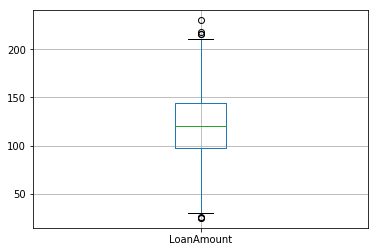

In [40]:
df.boxplot(column='LoanAmount')
plt.show()

Replacing missing values with the median and
Converting numerical data to categorical data

In [41]:
df["LoanAmount"].fillna(df.LoanAmount.median(), inplace=True)
df["LoanAmount"] = pd.qcut(df.LoanAmount, 3, labels=[0,1,2])

/home/asutosh/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/asutosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Loan Amount Term

Replacing missing values with the median and
Converting numerical data to categorical data

In [16]:
df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.median(), inplace=True)
df["Loan_Amount_Term"] = pd.cut(df.Loan_Amount_Term, 3, labels=[0,1,2])

/home/asutosh/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/asutosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Credit History

In [17]:
df['Credit_History']=df['Credit_History'].fillna(0)

/home/asutosh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Property Area

In [18]:
PropertyAreaTypes = ["Urban","Rural","Semiurban"]
df.Property_Area = df.Property_Area.astype("category",categories=PropertyAreaTypes).cat.codes

/home/asutosh/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Loan Status

In [19]:
Loan_StatusTypes = ["N","Y"]
df.Loan_Status = df.Loan_Status.astype("category",categories=Loan_StatusTypes).cat.codes

/home/asutosh/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Thus all missing values are taken care of by either replacing it with median or removing the rows

In [21]:
Y = df["Loan_Status"]
X = df.drop(['Loan_Status','Loan_ID'], axis=1)

In [22]:
df.head(10)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,0,0,3,0,1,2,1.0,1,0
2,LP001005,1,0,0,1,1,0,0,2,1.0,0,1
3,LP001006,1,0,1,0,0,0,1,2,1.0,0,1
4,LP001008,0,0,0,0,4,0,2,2,1.0,0,1
5,LP001011,1,2,0,1,3,0,2,2,1.0,0,1
6,LP001013,1,0,1,0,0,0,0,2,1.0,0,1
7,LP001014,1,3,0,0,1,0,2,2,0.0,2,0
8,LP001018,1,2,0,0,2,0,2,2,1.0,0,1
10,LP001024,1,2,0,0,1,0,0,2,1.0,0,1
11,LP001027,1,2,0,0,0,0,1,2,1.0,0,1
